In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
import pingouin as pg
import reliability_stability
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\raft_data_7-nodes_3-fails.csv", error_bad_lines=False, sep=",")
paxos = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\paxos_data_7-nodes_3-fails.csv", error_bad_lines=False, sep=",")
noAlg = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\control\\outdoor_control_7-nodes_3-fails\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 1443: expected 8 fields, saw 9\nSkipping line 1477: expected 8 fields, saw 9\n'
b'Skipping line 2057: expected 8 fields, saw 9\n'
b'Skipping line 11: expected 8 fields, saw 9\nSkipping line 766: expected 8 fields, saw 9\nSkipping line 1698: expected 8 fields, saw 9\n'


In [4]:
raft.shape

(4806, 8)

In [5]:
paxos.shape

(5106, 8)

In [6]:
noAlg.shape

(2573, 8)

In [7]:
raft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      4805 non-null   object 
 1   packetNumber  4805 non-null   object 
 2   temperature   4803 non-null   object 
 3   brightness    4790 non-null   object 
 4   humidity      4765 non-null   object 
 5   onBoardTemp   4710 non-null   object 
 6   sent          4653 non-null   object 
 7   received      4562 non-null   float64
dtypes: float64(1), object(7)
memory usage: 300.5+ KB


In [8]:
paxos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      5106 non-null   object 
 1   packetNumber  5106 non-null   object 
 2   temperature   5102 non-null   object 
 3   brightness    5088 non-null   object 
 4   humidity      5083 non-null   object 
 5   onBoardTemp   5078 non-null   object 
 6   sent          5075 non-null   object 
 7   received      5068 non-null   float64
dtypes: float64(1), object(7)
memory usage: 319.2+ KB


In [9]:
noAlg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2573 non-null   object 
 1   packetNumber  2573 non-null   object 
 2   temperature   2525 non-null   object 
 3   brightness    2477 non-null   object 
 4   humidity      2444 non-null   object 
 5   onBoardTemp   2379 non-null   object 
 6   sent          2330 non-null   object 
 7   received      2274 non-null   float64
dtypes: float64(1), object(7)
memory usage: 160.9+ KB


In [10]:
raft[raft.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,2,1,20,77,35,20,706303144043,7.063031e+11
1,NaN,706303145385,706303145816,NaN,NaN,NaN,NaN,NaN
2,4,1,20,90,32,21,706303146219,7.063031e+11
3,7,1,21,41,33,21,7063031504179,7.063032e+11
4,3,2,19,55,41,20,706303155901,7.063032e+11
...,...,...,...,...,...,...,...,...
4801,5,996,22,0,35,23,706313637625,7.063136e+11
4802,5,997,21,65535,35,23,706313639134,7.063136e+11
4803,5,998,22,0,35,23,706313640642,7.063136e+11
4804,5,999,22,0,35,23,706313642149,7.063136e+11


In [11]:
paxos[paxos.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,1,2,21,449,29,24,706291581201,7.062916e+11
1,2,1,22,575,29,23,706291581580,7.062916e+11
2,NaN,706291582713,706291583340,NaN,NaN,NaN,NaN,NaN
3,NaN,706291583160,706291584202,NaN,NaN,NaN,NaN,NaN
4,NaN,706291584224,706291584852,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5101,5,996,21,43,32,22,706301970465,7.063020e+11
5102,5,997,21,39,32,22,706301971973,7.063020e+11
5103,5,998,21,39,32,22,706301973481,7.063020e+11
5104,5,999,21,43,32,22,706301974988,7.063020e+11


In [12]:
noAlg[noAlg.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,4,1,23,149,43,24,706636676156,7.066367e+11
1,7,1,24,129,42,23,706636676662,7.066367e+11
2,5,2,23,391,46,24,706636676901,7.066367e+11
3,4,3,23,132,43,24,706636678171,7.066367e+11
4,7,2,25,129,42,23,706636678670,7.066367e+11
...,...,...,...,...,...,...,...,...
2568,5,996,23,157,39,26,706638673029,7.066387e+11
2569,5,997,23,174,39,26,706638675036,7.066387e+11
2570,5,998,24,158,39,26,706638677044,7.066387e+11
2571,5,999,23,190,39,26,706638679052,7.066387e+11


In [13]:
raft_dropna=raft.dropna()

In [14]:
raft_dropna.shape

(4559, 8)

In [15]:
paxos_dropna=paxos.dropna()

In [16]:
paxos_dropna.shape

(5067, 8)

In [17]:
noAlg_dropna=noAlg.dropna()

In [18]:
noAlg_dropna.shape

(2274, 8)

In [19]:
raft_timings = raft_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [20]:
paxos_timings = paxos_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [21]:
noAlg_timings = noAlg_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [22]:
raft_timings_coerce = raft_timings.apply(pd.to_numeric, errors = 'coerce')

In [23]:
paxos_timings_coerce= paxos_timings.apply(pd.to_numeric, errors = 'coerce')

In [24]:
noAlg_timings_coerce= noAlg_timings.apply(pd.to_numeric, errors = 'coerce')

In [25]:
raft_timings_coerce_dropna=raft_timings_coerce.dropna()

In [26]:
paxos_timings_coerce_dropna=paxos_timings_coerce.dropna()

In [27]:
noAlg_timings_coerce_dropna=noAlg_timings_coerce.dropna()

In [28]:
raft_timings_coerce_dropna.shape

(4510, 2)

In [29]:
paxos_timings_coerce_dropna.shape

(5041, 2)

In [30]:
noAlg_timings_coerce_dropna.shape

(2161, 2)

In [31]:
raft_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4510 entries, 0 to 4805
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      4510 non-null   float64
 1   received  4510 non-null   float64
dtypes: float64(2)
memory usage: 105.7 KB


In [32]:
paxos_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5041 entries, 0 to 5105
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      5041 non-null   float64
 1   received  5041 non-null   float64
dtypes: float64(2)
memory usage: 118.1 KB


In [33]:
noAlg_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 2572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2161 non-null   float64
 1   received  2161 non-null   float64
dtypes: float64(2)
memory usage: 50.6 KB


In [34]:
raft_timings_redone = {'sent': [],'received':[]}

raft_result_redone = pd.DataFrame(raft_timings_redone)

In [35]:
paxos_timings_redone = {'sent': [],'received':[]}

paxos_result_redone = pd.DataFrame(paxos_timings_redone)

In [36]:
noAlg_timings_redone = {'sent': [],'received':[]}

noAlg_result_redone = pd.DataFrame(noAlg_timings_redone)

In [37]:
for index, row in raft_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > raft_timings_coerce_dropna['sent'].iloc[0]):
            
            raft_result_redone.at[index, 'sent'] = int(row['sent'])
            raft_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [38]:
for index, row in paxos_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > paxos_timings_coerce_dropna['sent'].iloc[0]):
            
            paxos_result_redone.at[index, 'sent'] = int(row['sent'])
            paxos_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [39]:
for index, row in noAlg_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > noAlg_timings_coerce_dropna['sent'].iloc[0]):
            
            noAlg_result_redone.at[index, 'sent'] = int(row['sent'])
            noAlg_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [40]:
raft_result_redone.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3595 entries, 2 to 4805
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      3595 non-null   float64
 1   received  3595 non-null   float64
dtypes: float64(2)
memory usage: 244.3 KB


In [41]:
paxos_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 1 to 5086
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      4272 non-null   float64
 1   received  4272 non-null   float64
dtypes: float64(2)
memory usage: 260.1 KB


In [42]:
noAlg_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 1 to 2572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2147 non-null   float64
 1   received  2147 non-null   float64
dtypes: float64(2)
memory usage: 130.3 KB


In [43]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=raft_result_redone)

(0.9999999593901441, array([1., 1.]))

In [44]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=paxos_result_redone)

(0.9999999992479216, array([1., 1.]))

In [45]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=noAlg_result_redone)

(0.9999999773847972, array([1., 1.]))

In [46]:
raft_latency_pd = {'latency': []}

raft_latency = pd.DataFrame(raft_latency_pd)

In [47]:
paxos_latency_pd = {'latency': []}

paxos_latency = pd.DataFrame(paxos_latency_pd)

In [48]:
noAlg_latency_pd = {'latency': []}

noAlg_latency = pd.DataFrame(noAlg_latency_pd)

In [49]:
for index, row in raft_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        raft_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [50]:
for index, row in paxos_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        paxos_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [51]:
for index, row in noAlg_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        noAlg_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [52]:
raft_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3595 entries, 2 to 4805
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  3595 non-null   float64
dtypes: float64(1)
memory usage: 216.2 KB


In [53]:
raft_latency.shape

(3595, 1)

In [54]:
paxos_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 1 to 5086
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  4272 non-null   float64
dtypes: float64(1)
memory usage: 226.8 KB


In [55]:
paxos_latency.shape

(4272, 1)

In [56]:
noAlg_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 1 to 2572
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  2147 non-null   float64
dtypes: float64(1)
memory usage: 113.5 KB


In [57]:
noAlg_latency.shape

(2147, 1)

In [58]:
raft_latency['latency'].mean()

203.4981919332406

In [59]:
paxos_latency['latency'].mean()

625.3394194756554

In [60]:
noAlg_latency['latency'].mean()

691.7508150908244

In [61]:
pwd

'C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook'

In [68]:
latency_7_2 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_7_2.csv", error_bad_lines=False, sep=",")

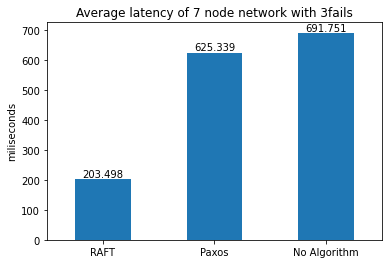

In [69]:
ax = latency_7_2.plot.bar(x='algorithm')
plt.title('Average latency of 7 node network with 3fails')
ax.set(xlabel='', ylabel='miliseconds')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
#plt.legend(loc='upper left')
ax.get_legend().remove()
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\latency_7_3_mean.png', bbox_inches='tight')